In [1]:
%matplotlib inline

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import namedtuple

In [3]:
def f(x):
    return -5*(x**2) + (1/6)*x**3  + 0.5*x**4 + 20

In [4]:
x = np.linspace(-3, 3, 100)
y = np.vectorize(f)(x)

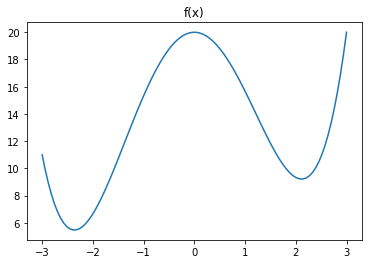

In [5]:
plt.plot(x, y)
plt.title("f(x)")
plt.savefig("./figures/01_fx.png")

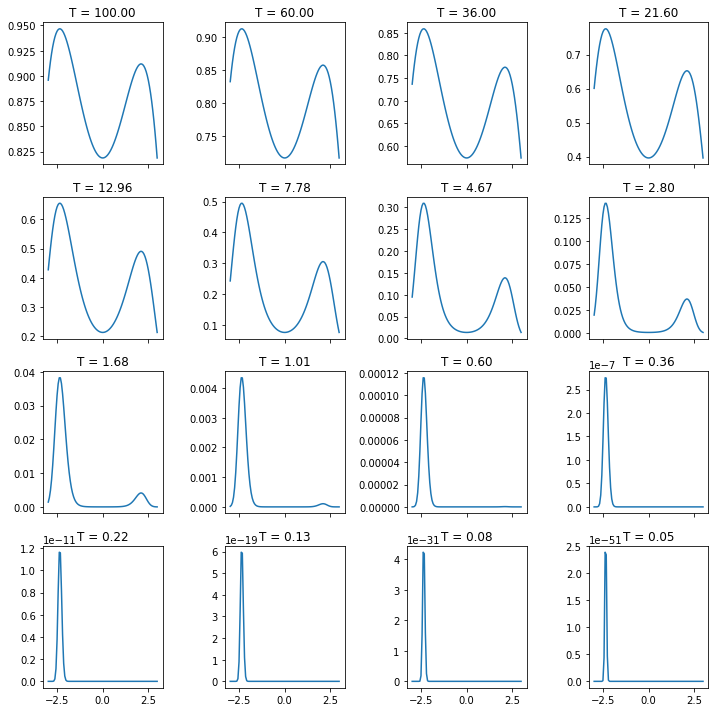

In [38]:
ts = np.zeros(16)
a = np.zeros((16, len(y)))
ts[0] = 100

_, axes = plt.subplots(4, 4, figsize=(10,10), sharex=True)

for ax, i in zip(axes.flatten(), range(0, len(ts))):
    if i > 0:
        ts[i] = ts[i-1] * 0.6
        
    a[i] = np.exp(-y/ts[i])
    
    ax.plot(x, a[i])
    ax.set_title("T = %0.2f" % ts[i])
    
plt.tight_layout()
plt.savefig("./figures/01_efx.png")

In [41]:
e = np.zeros((16,100))
t = 100
ts = []
for r in range(16):
    if r > 0:
        t = t * 0.6
    x1 = np.random.uniform(-3,3, 100)
    x2 = np.random.uniform(-3,3, 100)
    
    fx1 = f(x1)
    fx2 = f(x2)
    
    e[r] = np.exp((fx1 - fx2)/t)
    e[r, e[r] >= 1] = np.nan # Let's only look at the cases where fx1 < fx2
    
    ts.append(t)

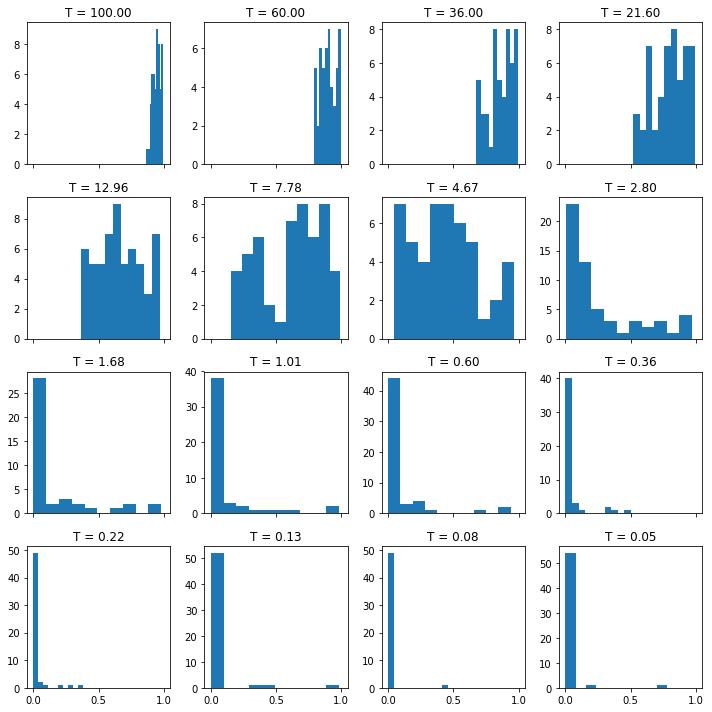

In [42]:
fig, axes = plt.subplots(4, 4, figsize=(10,10), sharex=True)
for i, ax in enumerate(axes.flatten()):
    v = e[i, ~np.isnan(e[i])]
    ax.hist(v, bins=10)
    ax.set_title("T = %0.2f" % ts[i])
    
plt.tight_layout()
plt.savefig("./figures/01_alpha.png")